### **Hotel Booking Demand**

1. Business Problem & Data Understanding
2. Data Cleaning, Feature Selection, & Feature Engineering
3. Analytics (Algorithm, Evaluation Metrics)
4. Conclusion and Recommendation/Improvement

#### **1. Business Problem & Data Understanding**

Hotel telah memiliki beberapa segmen pasar. Meskipun sudah banyak yang booking hotel, sekitar 30% di antaranya melakukan pembatalan. Pembatalan dapat menyebabkan kerugian pendapatan, biaya operasional tambahan, dan masalah okupansi.

Model ML Logistic Regression akan digunakan dan akan ditujukan pada beberapa stakeholder berikut:
- Tim reservasi hotel agar mengantisipasi pembatalan booking.
- Tim marketing untuk menyesuaikan promo berdasarkan kemungkinan pembatalan.
- Manajemen untuk mengambil keputusan strategi kebijakan deposit.

Model ML akan digunakan saat booking baru masuk untuk memprediksi kemungkinan pembatalan (is_canceled) dan sebelum periode check-in untuk mengingatkan pelanggan berisiko tinggi membatalkan.

Atribut informasi pada dataset hotel booking demand:
| **Kolom** | **Tipe Data** | **Deskripsi**
| -- | -- | -- |
| country | object | negara booking hotel terjadi
| market_segment | object | segmen pasar pemesan
| previous_cancellations | integer | riwayat pembatalan booking sebelumnya
| booking_changes | integer | jumlah perubahan booking
| deposit_type | object | jenis deposit
| days_in_waiting_list | integer | jumlah hari book hotel terkonfirmasi
| customer_type | object | tipe pemesan
| reserved_room_type | object | Kode ruang kamar yang dipesan
| required_car_parking_space | integer | Jumlah kapasitas mobil di parkiran mobil
| total_of_special_request | integer | Jumlah permintaan spesial pemesan
| is_canceled | integer | label hotel dibatalkan (1) atau tidak dibatalkan (0)

#### **2. Data Cleaning, Feature Selection, Feature Engineering**

Data dimulai dari melihat distribusi pembatalan booking, lalu dilanjut data cleaning, feature selection, dan feature engineering.

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data_hotel_booking_demand.csv')
df

,country,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled
0,IRL,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0,0
1,FRA,Online TA,0,0,No Deposit,0,Transient,A,0,2,0
2,PRT,Online TA,0,1,No Deposit,0,Transient,A,0,2,0
3,NLD,Online TA,0,0,No Deposit,0,Transient,A,0,1,1
4,PRT,Online TA,0,2,No Deposit,0,Transient,A,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...
83568,PRT,Online TA,0,0,No Deposit,0,Contract,A,0,3,1
83569,FRA,Online TA,0,0,No Deposit,0,Transient,D,0,2,0
83570,PRT,Online TA,0,1,No Deposit,0,Transient,D,0,3,0
83571,CN,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0,0


is_canceled
0    52795
1    30777
Name: count, dtype: int64
is_canceled
0    63.173072
1    36.826928
Name: proportion, dtype: float64


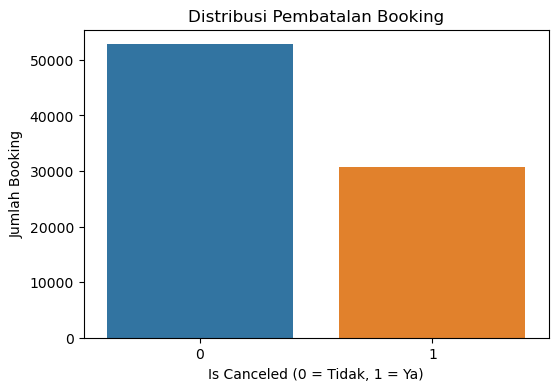

In [15]:
print(df['is_canceled'].value_counts())
print(df['is_canceled'].value_counts(normalize=True) * 100)

plt.figure(figsize=(6,4))
sns.countplot(x='is_canceled', data=df)
plt.title('Distribusi Pembatalan Booking')
plt.xlabel('Is Canceled (0 = Tidak, 1 = Ya)')
plt.ylabel('Jumlah Booking')
plt.show()

**Feature selection**

Kolom yang akan digunakan adalah:
- market_segment
- previous_cancellations
- booking_changes
- deposit_type
- is_canceled

In [4]:
df = df[['market_segment', 'previous_cancellations', 'booking_changes', 'deposit_type', 'is_canceled']]
df

,market_segment,previous_cancellations,booking_changes,deposit_type,is_canceled
0,Offline TA/TO,0,0,No Deposit,0
1,Online TA,0,0,No Deposit,0
2,Online TA,0,1,No Deposit,0
3,Online TA,0,0,No Deposit,1
4,Online TA,0,2,No Deposit,0
...,...,...,...,...,...
83568,Online TA,0,0,No Deposit,1
83569,Online TA,0,0,No Deposit,0
83570,Online TA,0,1,No Deposit,0
83571,Offline TA/TO,0,0,No Deposit,0


**Data Cleaning**

Tidak ada data kosong pada kolom yang akan digunakan. Namun akan membuang data 'undefined' pada kolom market_segment

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83573 entries, 0 to 83572
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   market_segment          83573 non-null  object
 1   previous_cancellations  83573 non-null  int64 
 2   booking_changes         83573 non-null  int64 
 3   deposit_type            83573 non-null  object
 4   is_canceled             83573 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 3.2+ MB


In [6]:
df['market_segment'].unique()

array(['Offline TA/TO', 'Online TA', 'Direct', 'Groups', 'Corporate',
       'Complementary', 'Aviation', 'Undefined'], dtype=object)

In [7]:
df = df[df['market_segment'] != 'Undefined'].reset_index(drop=True)
df

,market_segment,previous_cancellations,booking_changes,deposit_type,is_canceled
0,Offline TA/TO,0,0,No Deposit,0
1,Online TA,0,0,No Deposit,0
2,Online TA,0,1,No Deposit,0
3,Online TA,0,0,No Deposit,1
4,Online TA,0,2,No Deposit,0
...,...,...,...,...,...
83567,Online TA,0,0,No Deposit,1
83568,Online TA,0,0,No Deposit,0
83569,Online TA,0,1,No Deposit,0
83570,Offline TA/TO,0,0,No Deposit,0


**Feature Engineering**

Kolom market_segment akan digolongkan menjadi 2 kategori, yaitu online dan offline. Serta kolom previous_cancellations dan booking_changes akan digabung menjadi 1 kolom booking_modification

In [8]:
online = ['Online TA']
offline = ['Offline TA/TO', 'Direct', 'Groups', 'Corporate', 'Complementary', 'Aviation']

df['market_segment'] = df['market_segment'].apply(
    lambda x: 'Online' if x in online else 'Offline' if x in offline else 'Other'
)

df

,market_segment,previous_cancellations,booking_changes,deposit_type,is_canceled
0,Offline,0,0,No Deposit,0
1,Online,0,0,No Deposit,0
2,Online,0,1,No Deposit,0
3,Online,0,0,No Deposit,1
4,Online,0,2,No Deposit,0
...,...,...,...,...,...
83567,Online,0,0,No Deposit,1
83568,Online,0,0,No Deposit,0
83569,Online,0,1,No Deposit,0
83570,Offline,0,0,No Deposit,0


In [9]:
df['booking_modifications'] = df['previous_cancellations'] + df['booking_changes']
df.drop(['previous_cancellations', 'booking_changes'], axis=1, inplace=True)
df

,market_segment,deposit_type,is_canceled,booking_modifications
0,Offline,No Deposit,0,0
1,Online,No Deposit,0,0
2,Online,No Deposit,0,1
3,Online,No Deposit,1,0
4,Online,No Deposit,0,2
...,...,...,...,...
83567,Online,No Deposit,1,0
83568,Online,No Deposit,0,0
83569,Online,No Deposit,0,1
83570,Offline,No Deposit,0,0


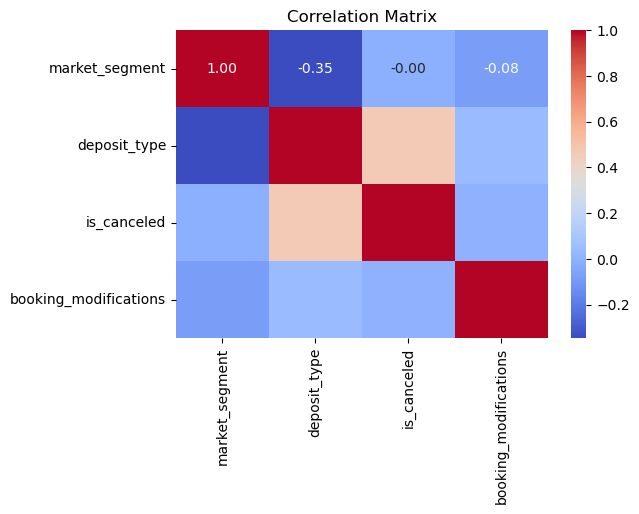

In [10]:
df['market_segment'] = df['market_segment'].map({'Offline': 0, 'Online': 1})
df['deposit_type'] = df['deposit_type'].map({'No Deposit': 0, 'Non Refund': 1, 'Refundable': 2})

corr = df.corr(method='pearson')

plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

market_segment vs is_canceled = -0.00
Korelasi hampir nol: tipe market segment (online/offline) tidak berhubungan signifikan dengan pembatalan.

deposit_type vs is_canceled = 0.39 (kurang lebih dari warna dan posisi)
Korelasi positif moderat: Semakin tinggi nilai deposit_type (dari No Deposit > Non Refund > Refundable), semakin besar kemungkinan pembatalan.

booking_modifications vs is_canceled = 0.06
Korelasi sangat rendah: Jumlah modifikasi booking tidak terlalu mempengaruhi pembatalan secara langsung.

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, r2_score

Accuracy: 0.7517200119653006
              precision    recall  f1-score   support

           0       0.72      1.00      0.84     10605
           1       0.98      0.33      0.49      6110

    accuracy                           0.75     16715
   macro avg       0.85      0.66      0.66     16715
weighted avg       0.82      0.75      0.71     16715



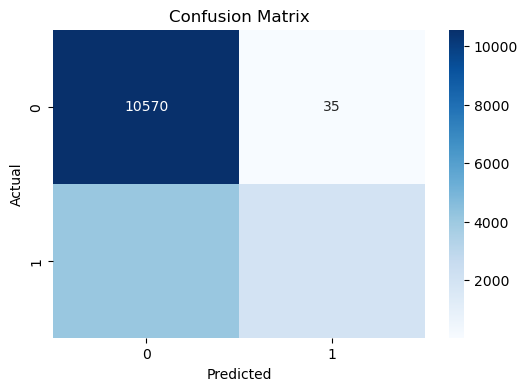

In [33]:
X = df[['market_segment', 'deposit_type']]
y = df['is_canceled']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**Precision (Ketepatan)**
Kelas 0: Dari semua prediksi “tidak batal”, 72% benar.
Kelas 1: Dari semua prediksi “batal”, 98% benar (sangat akurat).

**Recall (Sensitivitas)**
Kelas 0: Recall 1.00 artinya semua yang sebenarnya “tidak batal” berhasil dideteksi (sangat bagus).
Kelas 1: Recall 0.33 artinya hanya 33% dari yang sebenarnya batal bisa dikenali (cukup rendah).

**F1-score**
Kelas 0: 0.84 (bagus)
Kelas 1: 0.49 (kurang bagus, terutama karena recall rendah)

**Accuracy**
Persentase prediksi benar secara keseluruhan 75%.

**Macro avg**
Rata-rata sederhana precision, recall, f1 tanpa memperhitungkan jumlah kelas. Berguna untuk lihat performa rata-rata tiap kelas.

**Weighted avg**
Rata-rata yang memperhitungkan proporsi kelas, lebih mewakili performa keseluruhan.

#### **4. Conclusion & Recommendation**

- Model sangat bagus untuk mengenali kelas 0 (tidak batal) dengan recall sempurna, artinya hampir tidak ada false negative untuk kelas ini.
- Namun model kurang bagus mengenali kelas 1 (batal) karena recall hanya 33%, jadi banyak yang batal tidak terdeteksi (false negative tinggi).
- Precision kelas 1 sangat tinggi (98%), berarti jika model bilang batal, hampir pasti benar. Ini menunjukkan model “hati-hati” memberi label batal.
- Akurasi total 75% cukup baik tapi kurang mewakili performa pada kelas minoritas (kelas 1).
- Gunakan prediksi pembatalan untuk strategi marketing atau penyesuaian harga deposit.
Misal, jika model prediksi booking berpotensi batal, bisa dilakukan follow-up atau insentif untuk mempertahankan pelanggan.